In [ ]:
#Importing required Libraries
import re
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import warnings
warnings.filterwarnings('ignore')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#ML LIbraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
df=pd.read_csv('train(2).csv')

In [ ]:
df.head()

,Id,text,Target
0,1,@USAirways ! THE WORST in customer service. @...,-1
1,2,@united call wait times are over 20 minutes an...,-1
2,3,@JetBlue what's up with the random delay on fl...,-1
3,4,@AmericanAir Good morning! Wondering why my p...,0
4,5,@united UA 746. Pacific Rim and Date Night cut...,-1


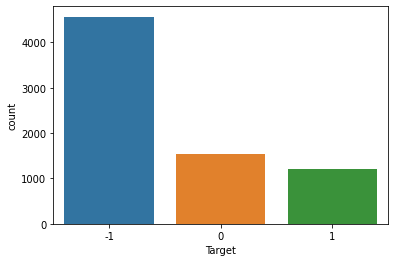

In [ ]:
import seaborn as sns
sns.countplot(df['Target'])

In [ ]:
#Since, the data in imbalanced, I've resampled it.
neg=df.where(df['Target']==-1)
neut=df.where(df['Target']==0)
pos=df.where(df['Target']==1)

In [ ]:
neg.dropna(inplace=True, axis=0)
pos.dropna(inplace=True, axis=0)
neut.dropna(inplace=True, axis=0)

In [ ]:
neg.shape

(4566, 3)

In [ ]:
neg2=neg.sample(frac=0.33, random_state=60)

In [ ]:
df=pd.concat([neg2,neut,pos], axis=0)

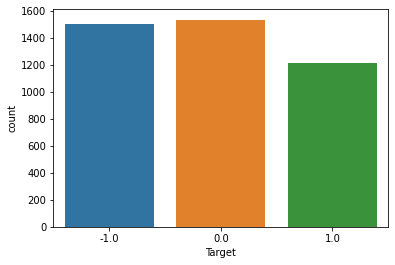

In [ ]:
df=df.sample(frac=1, random_state=60)
sns.countplot(df['Target'])
#Data is now balanced

In [ ]:
def process_tweet(tweet): #Created function to prcess a given tweet #Deeplearning.ai
   
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  
                word not in string.punctuation):  
            stem_word = stemmer.stem(word) 
            lemm_word = lemmatizer.lemmatize(stem_word)
            tweets_clean.append(lemm_word)

    return tweets_clean


In [ ]:
def build_freqs(tweets, ys): #Created function to create a dectionary including a (word, sentiment) tuple with its frequency
    yslist = np.squeeze(ys).tolist()

    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [ ]:
df=df.drop('Id', axis=1) #removing index column

In [ ]:
df=df.set_index(np.arange(1, 4262)) #creating a series index column

In [ ]:
tweet=df['text']
sentiment=df['Target']

In [ ]:
#Splitting the data into train and test
train_x=tweet[:3300]
train_y=sentiment[:3300]
test_x=tweet[3300:]
test_y=sentiment[3300:]

In [ ]:
test_x

3301                                   @JetBlue you bet:)
3302                              @AmericanAir Thank you.
3303    @united has the worst flight attendants. They ...
3304    @AmericanAir  hung up on now many times trying...
3305    @united I don't know what DM the confirmation ...
                              ...                        
4257    @JetBlue Hopefully next time! Can I send you m...
4258    @SouthwestAir flight Cancelled Flightled out o...
4259    @united Thanks for the reminder. It's been a f...
4260    @SouthwestAir you only hear about the bad thin...
4261    @SouthwestAir @ClinicPolly \nThank you-- I may...
Name: text, Length: 961, dtype: object

In [ ]:
print('Unprocessed Tweet:',train_x[1])
process_tweet(train_x[1]) #Example of process tweet

Unprocessed Tweet: @united you have a guy named Otis at ORD that knows what #customerservice is. he was able to get my bag to me. I upgraded just to be sure


['guy',
 'name',
 'oti',
 'ord',
 'know',
 'customerservic',
 'abl',
 'get',
 'bag',
 'upgrad',
 'sure']

In [ ]:
train_y[1]

1.0

In [ ]:
#Creating a list X of all the tweets after processing them
X=[]
for i in range(1,len(train_x)):
  tokens = process_tweet(train_x[i])
  X.append(tokens)
print(X) 


[['guy', 'name', 'oti', 'ord', 'know', 'customerservic', 'abl', 'get', 'bag', 'upgrad', 'sure'], ['...', 'would', 'nice', 'see', 'servic', 'instead', 'drive', '3-4', 'hr', 'like', 'charlott', 'atlanta'], ['sure', 'wait', '15min', 'yay'], ['guy', 'realli', 'bad', 'fail', 'someon', 'better', 'call', 'wife', 'back', 'get', 'handl', '203-382-3312', 'wait', 'hold', '...'], ['contact', 'bank', 'took', 'money', 'today', 'also', 'contact', 'said', 'reserv'], ['parti', 'hotlanta'], ['superb', 'choic', 'swa', 'rave', 'fan', 'even', 'take', 'stress', 'weather-rel', 'flightd', 'glitch', 'custexp'], ['plan', 'restat', 'nonstop', 'servic', 'iad', 'south', 'florida', 'miss', 'flight', 'fll'], ['wow', 'thing', 'better', 'forgotten'], ['flight', 'get', 'chicago'], ['yeah', 'expect', '3', 'hour'], ['hi', 'want', 'see', 'new', 'rout', 'plan', 'year', 'newark', 'love', 'fli', 'guy', 'hope'], ['good', 'luck', 'no-enertainment-on', '6', 'hour-flight', 'strategi', 'innov', 'work', 'hello'], ['hi', 'jp', 'hel

In [ ]:

#Creating the Frequency dictionary
freq_dict = build_freqs(train_x, train_y)

# check the output
print("type(freq_dict) = " + str(type(freq_dict)))
print("len(freq_dict) = " + str(len(freq_dict.keys())))

type(freq_dict) = <class 'dict'>
len(freq_dict) = 7367


In [ ]:
def extract_features(tweet, freq_dict): 
#Creating a function that vectorizes every tweet to the size (1x4) and appends it to create a matrix with m rows and 4 columns
#[bias, 1,0,-1]

    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 4 vector
    x = np.zeros((1, 4)) 
    
    #bias term is set to 1
    x[0,0] = 1 

    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freq_dict.get((word, 1.0),0) 
        # increment the word count for the negative label 0
        x[0,2] += freq_dict.get((word, 0.0),0)
        # increment the word count for the negative label -1
        x[0,3] += freq_dict.get((word, -1.0),0)

    assert(x.shape == (1, 4))
    return x

In [ ]:
#Creating the matrix with tweet vectors
X = np.zeros((len(train_x), 4))
for i in range(1,len(train_x)):
    X[i, :]= extract_features(train_x[i], freq_dict)

# training labels corresponding to X
Y = train_y

In [ ]:
logit=LogisticRegression()
logit.fit(X,Y)
print(logit.score(X,Y))
scores=cross_val_score(logit, X,Y, scoring='f1_macro', cv=10)
print(scores)
np.mean(scores)

0.36272727272727273
[0.23417013 0.21544179 0.22465715 0.25461013 0.23793421 0.25816102
 0.20342477 0.23728965 0.25045823 0.25701811]


0.23731651763491368

**The Accuracy is very low, trying n-gram models and inbuilt vectorizers**

In [ ]:
count_vectorizer = CountVectorizer(min_df=2, max_df=0.96, ngram_range=(1,2))
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.96, ngram_range=(1,2))
hash_vectorizer = HashingVectorizer(ngram_range=(1,2))

In [ ]:
x_cv = count_vectorizer.fit_transform(train_x)
x_tv = tfidf_vectorizer.fit_transform(train_x)
x_hv = hash_vectorizer.fit_transform(train_x)
xt_cv = count_vectorizer.transform(test_x)
xt_tv = tfidf_vectorizer.transform(test_x)
xt_hv = hash_vectorizer.transform(test_x)


In [ ]:
#Bigram Count Vectorizer LOGISTIC
logit=LogisticRegression(C=0.5, multi_class='auto', solver='liblinear', penalty='l1',random_state=6)
logit.fit(x_cv, train_y)
pred_logit=logit.predict(xt_cv)
f1_score(test_y, pred_logit, average='macro')

0.7277616453222774

In [ ]:
#Bigram Tfidf Vectorizer LOGISTIC
logit=LogisticRegression(C=1, multi_class='multinomial', solver='lbfgs', penalty='l2',random_state=6)
logit.fit(x_tv, train_y)
pred_logit=logit.predict(xt_tv)
f1_score(test_y, pred_logit, average='macro')

0.7207503955562462

In [ ]:
#Bigram Hashing Vectorizer LOGISTIC  Code is too slow
logit=LogisticRegression(C=1, multi_class='auto', solver='lbfgs', penalty='l2',random_state=6)
logit.fit(x_hv, train_y)
pred_logit=logit.predict(xt_hv)
f1_score(test_y, pred_logit, average='macro')

0.705626140833081

**Thus, CountVectorizer performs better than Tfidf and Hashing Vectorizer in this case**

In [ ]:
xgb=XGBClassifier(max_depth=8, learning_rate=0.5, n_estimators=120, objective='multi:softmax', min_child_weight=0.6, max_delta_step=5, reg_lambda=1)
xgb.fit(x_cv, train_y)
pred=xgb.predict(xt_cv)
f1_score(test_y, pred, average='macro')

0.716889585373949

In [ ]:
#Bigram Tfidf Vectorizer XGB
xgb=XGBClassifier(max_depth=3, learning_rate=0.3, n_estimators=150, objective='multi:softmax', num_class=3, random_state=6)
xgb.fit(x_tv, train_y)
pred=xgb.predict(xt_tv)
f1_score(test_y, pred, average='macro')

0.7101814863800583

In [ ]:
#Bigram Hashing Vectorizer XGB   Code takes very long to converge and fails to run
xgb=XGBClassifier(max_depth=3, learning_rate=0.3, n_estimators=150, objective='multi:softmax', num_class=3, random_state=6)
xgb.fit(x_hv, train_y)
pred=xgb.predict(xt_hv)
f1_score(test_y, pred, average='macro')

**For XGBoost Classifier also, CountVectorizer performed better than TfidfVectorizer**

In [ ]:
#Bigram Count Vectorizer Naive
naive= MultinomialNB(alpha=1)
naive.fit(x_cv, train_y)
pred=naive.predict(xt_cv)
f1_score(test_y, pred, average='macro')

0.7057783395521445

In [ ]:
#Bigram Tfidf Vectorizer Naive
naive= MultinomialNB(alpha=1)
naive.fit(x_tv, train_y)
pred=naive.predict(xt_cv)
f1_score(test_y, pred, average='macro')

0.7106729311407675

In [ ]:
#Gridsearch Logistic
param_grid = {'multi_class': ['auto','multinomial'], 'C':[0.01,0.05,0.1,0.5,1], 'solver':['lbfgs', 'saga', 'sag'], 'penalty':['l1','l2']}
grid_logit = GridSearchCV(LogisticRegression(), param_grid, scoring='f1_macro', cv=10)
grid_logit.fit(x_cv,y_train)
print(grid_logit.best_params_)
print(grid_logit.best_score_)

{'C': 1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'sag'}
0.7029490279657953


In [ ]:
#GridSearch XGBoost
param_grid = {'max_depth': [3,6,9], 'objective':['multi:softmax'], 'learning_rate':[0.01,0.05,0.1,0.5,1], 'n_estimators':[50,75,100], 'reg_lambda':[0.1,1,10]}
grid_xgb = GridSearchCV(XGBClassifier(), param_grid, scoring='f1_macro', cv=5)
grid_xgb.fit(x_cv,y_train)
print(grid_xgb.best_params_)
print(grid_xgb.best_score_)

{'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 75, 'objective': 'multi:softmax', 'reg_lambda': 1}
0.6922705158467728


In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
test.head()

,id,text
0,7322,@AmericanAir In car gng to DFW. Pulled over 1h...
1,7323,"@AmericanAir after all, the plane didnÛªt lan..."
2,7324,@SouthwestAir can't believe how many paying cu...
3,7325,@USAirways I can legitimately say that I would...
4,7326,@AmericanAir still no response from AA. great ...


In [ ]:
xt_cv = count_vectorizer.transform(test['text']) #Vectorizing Test Data

In [ ]:
test['Target'] = logit.predict(xt_cv) #Using Logistic Regression to Predict 

In [ ]:
test.head()

,id,text,Target
0,7322,@AmericanAir In car gng to DFW. Pulled over 1h...,-1.0
1,7323,"@AmericanAir after all, the plane didnÛªt lan...",-1.0
2,7324,@SouthwestAir can't believe how many paying cu...,-1.0
3,7325,@USAirways I can legitimately say that I would...,0.0
4,7326,@AmericanAir still no response from AA. great ...,1.0


In [ ]:
test=test.drop('text',axis=1)

In [ ]:
test.head()

,id,Target
0,7322,-1.0
1,7323,-1.0
2,7324,-1.0
3,7325,0.0
4,7326,1.0


In [ ]:
test.to_csv('Predictions.csv')

In [ ]:
from google.colab import files
files.download('Predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>